# Profit Loss simulation with real sell/buy/hold

In [1]:
#Import necessary libraries
import h2o
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline 

In [2]:
# Read all data into memory
all_data_df = pd.read_csv("./price_EUR_USD_D1_merge.csv")
all_data_df.columns

Index([u'Date', u'Currency_pair', u'Prediction_action', u'Day Open', u'Day Close', u'Day High', u'Day Low', u'Day Average', u'Momentum_3day', u'Momentum_4day', u'Momentum_5day', u'Momentum_8day', u'Momentum_9day', u'Momentum_10day', u'Roc_3day', u'Roc_4day', u'Roc_5day', u'Roc_8day', u'Roc_9day', u'Roc_10day', u'Fast_k_3day', u'Fast_d_3day', u'Fast_k_4day', u'Fast_d_4day', u'Fast_k_5day', u'Fast_d_5day', u'Fast_k_8day', u'Fast_d_8day', u'Fast_k_9day', u'Fast_d_9day', u'Fast_k_10day', u'Fast_d_10day', u'PROC_12day', u'PROC_13day', u'PROC_14day', u'PROC_15day', u'Weighted_Close_Price', u'WILLIAM_A_D', u'ADOSC_1day', u'ADOSC_2day', u'ADOSC_3day', u'ADOSC_4day', u'ADOSC_5day', u'EMA_12Day', u'EMA_26Day', u'MACD', u'CCI', u'BOLLINGER_BANDS_LOW', u'BOLLINGER_BANDS_HIGH', u'HEIKIN_ASHI_XCLOSE', u'HEIKIN_ASHI_XOPEN', u'HEIKIN_ASHI_XHIGH', u'HEIKIN_ASHI_XLOW', u'2DAY_HIGH', u'2DAY_LOW', u'1DAY_HIGH_LOW_AVG', u'2DAY_HIGH_LOW_AVG', u'High_slope_3day', u'High_slope_4day', u'High_slope_5day', u'Hig

In [3]:
list(all_data_df[all_data_df.Date <= '2005-01-07'][-3:]['Date'])

['2005-01-05', '2005-01-06', '2005-01-07']

In [4]:
#sampling date and write to a temprary csv
def write_sample_data_to_csv(df,date_str_model,out_csv_file_model,date_str_predict,out_csv_file_predict):
    new_df_model = df[df.Date <= date_str_model]
    new_df_model.to_csv(out_csv_file_model,index = False )
    new_df_predict = df[df.Date == date_str_predict]
    new_df_predict.to_csv(out_csv_file_predict,index = False )


#Generate date string list: The date to have a trading, one day before and the day before the last day
def get_date_str_for_modeling(date_str):
    date_str_list = list(all_data_df[all_data_df.Date <= date_str][-3:]['Date'])
    return date_str_list

date_str_list = get_date_str_for_modeling('2005-01-07')
print(date_str_list)
write_sample_data_to_csv(all_data_df,date_str_list[0],'./tmp_model.csv',date_str_list[1],'./tmp_predict.csv')

['2005-01-05', '2005-01-06', '2005-01-07']


In [5]:
datetime(2012,10,1).strftime ('%Y-%m-%d')
a=pd.date_range('2012-1-1', periods=10, freq='D')
a[0].strftime ('%Y-%m-%d')

'2012-01-01'

In [6]:
h2o.init()
features = [ u'Day Open', u'Day Close', u'Day High', u'Day Low', u'Day Average', u'Momentum_3day', u'Momentum_4day',
            u'Momentum_5day', u'Momentum_8day', u'Momentum_9day', u'Momentum_10day',
            u'Roc_3day', u'Roc_4day', u'Roc_5day', u'Roc_8day', u'Roc_9day', u'Roc_10day', u'Fast_k_3day', 
            u'Fast_d_3day', u'Fast_k_4day', u'Fast_d_4day', u'Fast_k_5day', u'Fast_d_5day', u'Fast_k_8day', 
            u'Fast_d_8day', u'Fast_k_9day', u'Fast_d_9day', u'Fast_k_10day', u'Fast_d_10day', u'PROC_12day',
            u'PROC_13day', u'PROC_14day', u'PROC_15day', u'Weighted_Close_Price', u'WILLIAM_A_D', u'ADOSC_1day',
            u'ADOSC_2day', u'ADOSC_3day', u'ADOSC_4day', u'ADOSC_5day', u'EMA_12Day', u'EMA_26Day', u'MACD', 
            u'CCI', u'BOLLINGER_BANDS_LOW', u'BOLLINGER_BANDS_HIGH', u'HEIKIN_ASHI_XCLOSE', u'HEIKIN_ASHI_XOPEN', 
            u'HEIKIN_ASHI_XHIGH', u'HEIKIN_ASHI_XLOW', u'2DAY_HIGH', u'2DAY_LOW', u'1DAY_HIGH_LOW_AVG', 
            u'2DAY_HIGH_LOW_AVG', u'High_slope_3day', u'High_slope_4day', u'High_slope_5day', u'High_slope_8day',
            u'High_slope_10day', u'High_slope_12day', u'High_slope_15day', u'High_slope_20day', u'High_slope_25day', 
            u'High_slope_30day', u'Pips',  u'Volume', u'Active Hour', u'Active Hour Volume']

label = [u'Prediction_action']

#Create model with model_csv and do use the model to predict the data inside predict_csv
def predict_trade_action(model_csv,predict_csv):
    
    df_model_h2o = h2o.import_frame(path = h2o.locate(model_csv))
    df_predict_h2o = h2o.import_frame(path = h2o.locate(predict_csv))
    model_gbm = h2o.gbm(
               y=  df_model_h2o[label],
               x = df_model_h2o[features],
               balance_classes=True,
               ntrees         =50,
               max_depth      =5,
               distribution   ="bernoulli",
               learn_rate     =0.1)
    predict_results = model_gbm.predict(df_predict_h2o[features])
    return predict_results.as_data_frame()

current_date_str = '2015-01-01'
date_str_list = get_date_str_for_modeling(current_date_str)
print(date_str_list)
write_sample_data_to_csv(all_data_df,date_str_list[0],'./tmp_model.csv',date_str_list[1],'./tmp_predict.csv')
df_predict_results = predict_trade_action('tmp_model.csv','tmp_predict.csv')

H2O cluster uptime:,4 minutes 10 seconds 62 milliseconds
H2O cluster version:,3.0.1.3
H2O cluster name:,H2O_started_from_python
H2O cluster total nodes:,1
H2O cluster total memory:,3.46 GB
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster healthy:,True
H2O Connection ip:,127.0.0.1
H2O Connection port:,54321


['2014-12-30', '2014-12-31', '2015-01-01']

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,213 rows and 72 cols

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_predict.csv. Parsed 1 rows and 72 cols

gbm Model Build Progress: [##################################################] 100%


In [7]:
df_predict_results

,predict,buy,sell
0,sell,0.166712,0.833288


In [8]:
def simulate_trading_profit(trade_date,stop_loss,stop_profit,pip_unit):
    
    date_str_list = get_date_str_for_modeling(trade_date) # 0: the day before yesterday, 1:yesterday, 2:today.
    
    write_sample_data_to_csv(all_data_df,date_str_list[0],'./tmp_model.csv',date_str_list[1],'./tmp_predict.csv')
    df_predict_results = predict_trade_action('tmp_model.csv','tmp_predict.csv')
    df_simulate_result = df_predict_results
    df_simulate_result.index = [trade_date]
    #Trading strategy: buy/sell as predicted, but if probabilty difference is less than 0.25, make it as hold
    #Use the close_price for the last day to specify the price for the order
    df_simulate_result['actual_action'] = df_simulate_result['predict']
    if abs(df_simulate_result['buy'][trade_date] - df_simulate_result['sell'][trade_date]) <0.25:
        df_simulate_result['actual_action'][trade_date] = 'hold'
    #order_price = float(all_data_df[all_data_df.Date == date_str_list[1]] ['Day Average'])
    order_price = float(all_data_df[all_data_df.Date == date_str_list[1]] ['Day Close'])
    #buy:+1, sell:-1, hold:0
    order_action = (int(df_simulate_result['actual_action'] == 'buy') + 
                    (-1)* int(df_simulate_result['actual_action'] == 'sell')
                   )
    #trade day actual price situation
    trade_price_low = float(all_data_df[all_data_df.Date == date_str_list[2]] ['Day Low'])
    trade_price_high = float(all_data_df[all_data_df.Date == date_str_list[2]] ['Day High'])
    trade_price_close = float(all_data_df[all_data_df.Date == date_str_list[2]] ['Day Close'])
    
    stop_loss_hit = 0
    stop_profit_hit = 0
    
    if order_action == 1 : #buy
        #calculate stop_loss, stop_profit hit 
        if (order_price - trade_price_low) > float(stop_loss)/float(pip_unit) :
            stop_loss_hit = 1
        if (trade_price_high - order_price ) > float(stop_profit)/float(pip_unit) :
            stop_profit_hit = 1
    elif order_action == -1 : #sell
        #calculate stop_loss, stop_profit hit
        if (order_price - trade_price_low) > float(stop_profit)/float(pip_unit) :
            stop_profit_hit = 1
        if (trade_price_high - order_price ) > float(stop_loss)/float(pip_unit) :
            stop_loss_hit = 1
        
    #actual profit in pips
    actual_profit_pips = ( (stop_loss_hit * stop_loss *-1) +  #Stop Loss
                           (stop_profit_hit * (1-stop_loss_hit) * stop_profit )  + #Stop Profit
                           ( int((1-stop_profit_hit) * (1-stop_loss_hit) * (trade_price_close - order_price) *pip_unit * order_action)) #close price tradinf
                          )
    actual_profit_pips = actual_profit_pips *abs(order_action)
                          
    #print((order_price,order_action,trade_price_low,trade_price_high,trade_price_close,stop_loss_hit,stop_profit_hit,actual_profit_pips))
    df_simulate_result['order_price'] = order_price
    df_simulate_result['stop_loss'] = stop_loss
    df_simulate_result['stop_profit'] = stop_profit
    df_simulate_result['stop_loss_hit'] = stop_loss_hit
    df_simulate_result['stop_profit_hit'] = stop_profit_hit
    df_simulate_result['actual_profit_pips'] = actual_profit_pips
    return df_simulate_result


In [9]:
trade_result_1 = simulate_trading_profit('2015-06-01',50,30,10000)
print(trade_result_1)
trade_result_2 = simulate_trading_profit('2015-05-01',50,30,10000)
print(trade_result_2)
trade_result_3 = simulate_trading_profit('2015-05-01',50,30,10000)
print(trade_result_3)



Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,342 rows and 72 cols

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_predict.csv. Parsed 1 rows and 72 cols

gbm Model Build Progress: [##################################################] 100%
           predict       buy      sell actual_action  order_price  stop_loss  \
2015-06-01    sell  0.318793  0.681207          sell      1.09572         50   

            stop_profit  stop_loss_hit  stop_profit_hit  actual_profit_pips  
2015-06-01           30              0                1                  30  

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,316 rows and 72 cols

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_predict.csv. Parsed 1 rows and 72 cols

g

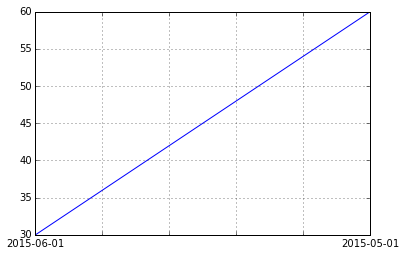

In [10]:
a=pd.concat((trade_result_1,trade_result_2))
a=a.cumsum()
#a.describe()
a['actual_profit_pips'].plot()

In [13]:
simulte_trade_result = None
date_rng= pd.date_range('2015-01-01', periods=200, freq='D')

for date_predict in date_rng:
    date_predict_str = date_predict.strftime ('%Y-%m-%d')
    if simulte_trade_result is None:
        tmp_trade_result = simulate_trading_profit(date_predict_str,100,80,10000)
        simulte_trade_result = tmp_trade_result
    else:
        tmp_trade_result = simulate_trading_profit(date_predict_str,100,80,10000)
        simulte_trade_result =pd.concat((simulte_trade_result,tmp_trade_result))
    print(date_predict_str,
          int(tmp_trade_result['actual_profit_pips'])
          ,sum(simulte_trade_result['actual_profit_pips']))


Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,213 rows and 72 cols

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_predict.csv. Parsed 1 rows and 72 cols

gbm Model Build Progress: [##################################################] 100%
('2015-01-01', 13, 13)

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,214 rows and 72 cols

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_predict.csv. Parsed 1 rows and 72 cols

gbm Model Build Progress: [##################################################] 100%
('2015-01-02', 0, 13)

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,214 rows and 72 cols

Parse Progress: [#####################

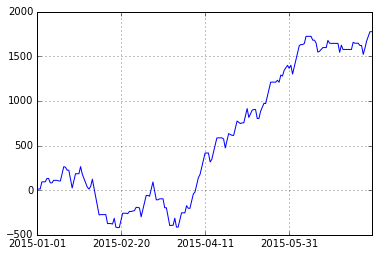

In [16]:
simulte_trade_result['actual_profit_pips'].cumsum().plot()

In [17]:
simulte_trade_result = None
date_rng= pd.date_range('2015-01-01', periods=200, freq='D')

for date_predict in date_rng:
    date_predict_str = date_predict.strftime ('%Y-%m-%d')
    if simulte_trade_result is None:
        tmp_trade_result = simulate_trading_profit(date_predict_str,50,80,10000)
        simulte_trade_result = tmp_trade_result
    else:
        tmp_trade_result = simulate_trading_profit(date_predict_str,50,80,10000)
        simulte_trade_result =pd.concat((simulte_trade_result,tmp_trade_result))
    print(date_predict_str,
          int(tmp_trade_result['actual_profit_pips'])
          ,sum(simulte_trade_result['actual_profit_pips']))


Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,213 rows and 72 cols

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_predict.csv. Parsed 1 rows and 72 cols

gbm Model Build Progress: [##################################################] 100%
('2015-01-01', 13, 13)

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,214 rows and 72 cols

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_predict.csv. Parsed 1 rows and 72 cols

gbm Model Build Progress: [##################################################] 100%
('2015-01-02', 0, 13)

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,214 rows and 72 cols

Parse Progress: [#####################

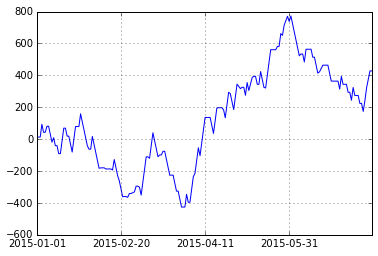

In [18]:
simulte_trade_result['actual_profit_pips'].cumsum().plot()

In [19]:
simulte_trade_result = None
date_rng= pd.date_range('2015-01-01', periods=200, freq='D')

for date_predict in date_rng:
    date_predict_str = date_predict.strftime ('%Y-%m-%d')
    if simulte_trade_result is None:
        tmp_trade_result = simulate_trading_profit(date_predict_str,150,80,10000)
        simulte_trade_result = tmp_trade_result
    else:
        tmp_trade_result = simulate_trading_profit(date_predict_str,150,80,10000)
        simulte_trade_result =pd.concat((simulte_trade_result,tmp_trade_result))
    print(date_predict_str,
          int(tmp_trade_result['actual_profit_pips'])
          ,sum(simulte_trade_result['actual_profit_pips']))


Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,213 rows and 72 cols

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_predict.csv. Parsed 1 rows and 72 cols

gbm Model Build Progress: [##################################################] 100%
('2015-01-01', 13, 13)

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,214 rows and 72 cols

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_predict.csv. Parsed 1 rows and 72 cols

gbm Model Build Progress: [##################################################] 100%
('2015-01-02', 0, 13)

Parse Progress: [##################################################] 100%
Imported /home/cyue/autotrade/tmp_model.csv. Parsed 3,214 rows and 72 cols

Parse Progress: [#####################

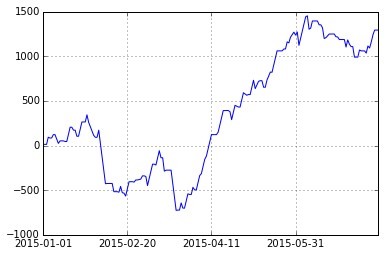

In [20]:
simulte_trade_result['actual_profit_pips'].cumsum().plot()